# Stacked Autoencoder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
tf.reset_default_graph() 

In [48]:
196/2

98.0

## Parameters

In [89]:
num_inputs = 784 # 28*28
neurons_hid1 = 392 #784/2
neurons_hid2 = 392*4 #392/2 #increased the number of neuros here for 
neurons_hid3 = 98 #196/2
neurons_hid4 = neurons_hid1 # Decoder Begins
num_outputs = num_inputs

learning_rate = 0.01

** Activation function **

### Placeholder

In [90]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [91]:
initializer = tf.variance_scaling_initializer()

In [92]:
w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1, neurons_hid2]), dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2, neurons_hid3]), dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3, neurons_hid4]), dtype=tf.float32)
w5 = tf.Variable(initializer([neurons_hid4, num_outputs]), dtype=tf.float32)


### Biases

In [93]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(neurons_hid4))
b5 = tf.Variable(tf.zeros(num_outputs))

### Activation Function and Layers

In [94]:
act_func = tf.nn.relu

In [95]:
hid_layer1 = act_func(tf.matmul(X, w1) + b1)
hid_layer2 = act_func(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = act_func(tf.matmul(hid_layer2, w3) + b3)
hid_layer4 = act_func(tf.matmul(hid_layer3, w4) + b4)
output_layer = tf.matmul(hid_layer4, w5) + b5

### Loss Function

In [96]:
loss = tf.reduce_mean(tf.square(output_layer - X))

### Optimizer

In [97]:
#tf.train.RMSPropOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate)

In [98]:
train = optimizer.minimize(loss)

### Intialize Variables

In [99]:
init = tf.global_variables_initializer()

In [100]:
saver = tf.train.Saver() 

In [101]:
55000 // 100

550

In [102]:
num_epochs = 15
batch_size = 1000
print(mnist.train.num_examples)
print(mnist.train.num_examples // batch_size)

55000
55


In [ ]:
with tf.Session() as sess:
    sess.run(init)
    
    # Epoch == Entire Training Set
    for epoch in range(num_epochs):
        
        num_batches = mnist.train.num_examples // batch_size #to avoid decimals #550
        
        # 1000 batch size
        for iteration in range(num_batches):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={X: X_batch})
            #print(X_batch.shape, y_batch.shape) #1000,784 : 1000,10
            #print(iteration)
            #print(epoch)
        
        training_loss = loss.eval(feed_dict={X: X_batch})   
        
        print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
     
    saver.save(sess, "./stacked_autoencoder.ckpt")      

Epoch 0 Complete. Training Loss: 0.06143815815448761
Epoch 1 Complete. Training Loss: 0.057764798402786255
Epoch 2 Complete. Training Loss: 0.05773453414440155
Epoch 3 Complete. Training Loss: 0.057836245745420456
Epoch 4 Complete. Training Loss: 0.05856148526072502
Epoch 5 Complete. Training Loss: 0.05720142275094986
Epoch 6 Complete. Training Loss: 0.05667265132069588
Epoch 7 Complete. Training Loss: 0.05709233507514
Epoch 8 Complete. Training Loss: 0.058344725519418716


## Test Autoencoder output on Test Data

In [ ]:
num_test_images = 5

with tf.Session() as sess:
    
    saver.restore(sess,"./stacked_autoencoder.ckpt")
    
    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})
    print(results.shape)

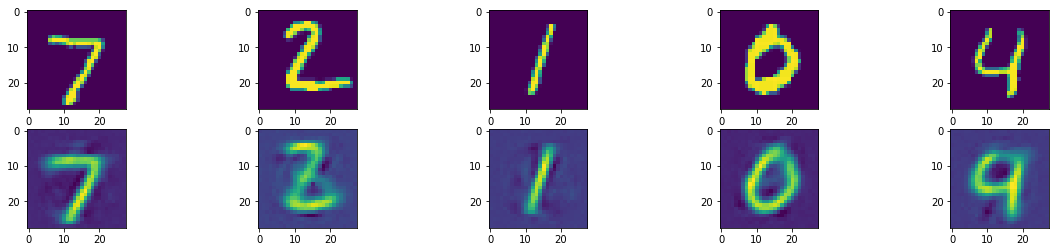

In [88]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 5, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))